# Import Modules

In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
%matplotlib inline
svm1 = svm.SVC(C=1, gamma=0.0001, probability=True, kernel = 'linear')
nb = GaussianNB(var_smoothing=1.873817422860383e-08)
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=17, weights='distance')
dt = DecisionTreeClassifier(criterion='entropy', max_depth=890, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=8,
                       splitter='random')
lrr = LogisticRegression(C=0.0005, max_iter=2011, multi_class='ovr',
                   solver='newton-cg')
lr = LogisticRegression()
svm2 = svm.SVC(probability=True)
bagging = BaggingClassifier()
boosting = GradientBoostingClassifier()
stacking = StackingClassifier(classifiers=[svm1, nb, knn, dt, lrr], meta_classifier = svm2)

In [3]:
data = pd.read_csv('JDT.csv')
data.shape

(997, 62)

In [4]:
data.describe()

ck_oo_numberOfPrivateMethods   LDHH_lcom  LDHH_fanIn  \
count                    997.000000  997.000000  997.000000   
mean                       1.297894    0.001777    0.002791   
std                        5.260343    0.004430    0.007316   
min                        0.000000    0.000000    0.000000   
25%                        0.000000    0.000000    0.000000   
50%                        0.000000    0.000000    0.000000   
75%                        1.000000    0.001192    0.001694   
max                      111.000000    0.045838    0.080233   

       numberOfNonTrivialBugsFoundUntil:  WCHU_numberOfPublicAttributes  \
count                         997.000000                     997.000000   
mean                           10.149448                       0.396409   
std                            19.400677                       1.320920   
min                             0.000000                       0.000000   
25%                             1.000000                       0.000000   
50%                             4.000000                       0.000000   
75%                            10.000000                       0.000000   
max                           200.000000                      15.200000   

       WCHU_numberOfAttributes  CvsWEntropy  LDHH_numberOfPublicMethods  \
count               997.000000   997.000000                  997.000000   
mean                  0.774764     0.053331                    0.001440   
std                   2.317190     0.159108                    0.003932   
min                   0.000000     0.000000                    0.000000   
25%                   0.000000     0.002877                    0.000000   
50%                   0.000000     0.007284                    0.000000   
75%                   1.010000     0.035064                    0.000905   
max                  32.470000     2.285260                    0.043532   

       WCHU_fanIn  LDHH_numberOfPrivateAttributes  ...  \
count  997.000000                      997.000000  ...   
mean     1.125777                        0.000567  ...   
std      2.880374                        0.002544  ...   
min      0.000000                        0.000000  ...   
25%      0.000000                        0.000000  ...   
50%      0.000000                        0.000000  ...   
75%      1.010000                        0.000000  ...   
max     35.570000                        0.037949  ...   

       numberOfBugsFoundUntil:  LDHH_fanOut  LDHH_numberOfMethodsInherited  \
count               997.000000   997.000000                     997.000000   
mean                 11.639920     0.002612                       0.007039   
std                  22.126592     0.005553                       0.009722   
min                   0.000000     0.000000                       0.000000   
25%                   1.000000     0.000000                       0.001487   
50%                   5.000000     0.000000                       0.002695   
75%                  11.000000     0.002669                       0.009737   
max                 214.000000     0.049184                       0.060148   

         LDHH_rfc  ck_oo_numberOfMethodsInherited  \
count  997.000000                      997.000000   
mean     0.006725                       49.236710   
std      0.013519                       50.367666   
min      0.000000                        0.000000   
25%      0.000000                       11.000000   
50%      0.001145                       33.000000   
75%      0.007382                       73.000000   
max      0.127115                      319.000000   

       ck_oo_numberOfPublicMethods    LDHH_cbo  WCHU_numberOfLinesOfCode  \
count                   997.000000  997.000000                997.000000   
mean                      8.952859    0.005242                  4.306800   
std                      19.967363    0.009770                  8.606297   
min                       0.000000    0.000000                  0.000000   
25%

In [52]:
data.head()

ck_oo_numberOfPrivateMethods  LDHH_lcom  LDHH_fanIn  \
0                             0   0.000934    0.000000   
1                             0   0.000741    0.000000   
2                             0   0.000000    0.000000   
3                             0   0.001529    0.015913   
4                             0   0.000000    0.000000   

   numberOfNonTrivialBugsFoundUntil:  WCHU_numberOfPublicAttributes  \
0                                  4                           0.00   
1                                  3                           0.00   
2                                  4                           0.00   
3                                 35                           0.00   
4                                  2                           1.01   

   WCHU_numberOfAttributes  CvsWEntropy  LDHH_numberOfPublicMethods  \
0                     0.00     0.004517                     0.00000   
1                     0.00     0.014817                     0.00091   
2                     1.01     0.024575                     0.00000   
3                     0.00     0.347495                     0.00165   
4                     1.01     0.012120                     0.00000   

   WCHU_fanIn  LDHH_numberOfPrivateAttributes  ...  LDHH_fanOut  \
0        0.00                             0.0  ...     0.000993   
1        0.00                             0.0  ...     0.000889   
2        0.00                             0.0  ...     0.002827   
3        2.03                             0.0  ...     0.010602   
4        0.00                             0.0  ...     0.005223   

   LDHH_numberOfMethodsInherited  LDHH_rfc  ck_oo_numberOfMethodsInherited  \
0                       0.025009  0.000969                             127   
1                       0.001487  0.002523                               8   
2                       0.021650  0.003656                              45   
3                       0.012864  0.060975                              94   
4                       0.023725  0.006207                              73   

   ck_oo_numberOfPublicMethods  LDHH_cbo  WCHU_numberOfLinesOfCode  \
0                            4  0.001007                      1.03   
1                            9  0.000967                      2.06   
2                            1  0.002917                      1.20   
3                           21  0.027947                     24.14   
4                            0  0.007285                      2.15   

   CvsExpEntropy  LDHH_numberOfMethods  classes  
0       0.198199              0.001036    clean  
1       0.239334              0.000923    clean  
2       0.187460              0.000000    clean  
3       0.392389              0.001669    buggy  
4       0.047726              0.000000    clean  

[5 rows x 62 columns]

In [53]:
def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_values = {}
        
        def convert_to_int(val):
            return text_digit_values[val]
        
        if(df[column].dtype != np.int64 and df[column].dtype != np.float64):
            column_elements = df[column].values.tolist()
            unique_elements = set(column_elements)
#             print(unique_elements)
            x = 1
            for unique in unique_elements:
                if unique not in text_digit_values:
                    text_digit_values[unique] = x
                    x -= 1
            
            df[column] = list(map(convert_to_int, df[column]))
    
    return df

data = handle_non_numeric_data(data)
print(data.head())

   ck_oo_numberOfPrivateMethods  LDHH_lcom  LDHH_fanIn  \
0                             0   0.000934    0.000000   
1                             0   0.000741    0.000000   
2                             0   0.000000    0.000000   
3                             0   0.001529    0.015913   
4                             0   0.000000    0.000000   

   numberOfNonTrivialBugsFoundUntil:  WCHU_numberOfPublicAttributes  \
0                                  4                           0.00   
1                                  3                           0.00   
2                                  4                           0.00   
3                                 35                           0.00   
4                                  2                           1.01   

   WCHU_numberOfAttributes  CvsWEntropy  LDHH_numberOfPublicMethods  \
0                     0.00     0.004517                     0.00000   
1                     0.00     0.014817                     0.00091   
2          

In [54]:
array = data.values
X = array[:,0:61]
Y = array[:,61]

# Not Using Hyper Parameter Tuning in Bagging

In [55]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=6)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = bagging
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

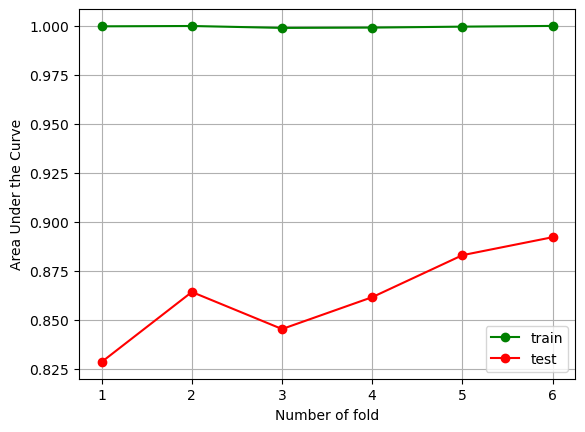

In [56]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [57]:
n_estimators = [20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
max_samples = [x / 10 for x in range(1, 11)]
max_features = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.90, 0.92, 0.95, 1.0]
bootstrap = [True, False]
bootstrap_features = [True, False]
oob_score = [True, False]
warm_start = [True, False]

random_grid = {
    'n_estimators':n_estimators,
    'max_samples':max_samples,
    'max_features':max_features,
    'bootstrap':bootstrap,
    'bootstrap_features':bootstrap_features,
    'oob_score':oob_score,
    'warm_start':warm_start
}
print(random_grid)

{'n_estimators': [20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.95, 1.0], 'bootstrap': [True, False], 'bootstrap_features': [True, False], 'oob_score': [True, False], 'warm_start': [True, False]}


In [58]:
dt_randomcv=RandomizedSearchCV(estimator=bagging,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100)
dt_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, max_samples=0.8, n_estimators=500, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, max_samples=0.8, n_estimators=500, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, max_samples=0.8, n_estimators=500, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.9, max_samples=0.6, n_estimators=900, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.9, max_samples=0.6, n_estimators=900, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.9, max_samples=0.6, n_estimators=900, oob_score=True, warm_start=True; total time=   0.0

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.4, max_samples=0.2, n_estimators=100, oob_score=False, warm_start=True; total time=   0.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.4, max_samples=0.2, n_estimators=100, oob_score=False, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, max_samples=0.3, n_estimators=300, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, max_samples=0.3, n_estimators=300, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, max_samples=0.3, n_estimators=300, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.3, n_estimators=500, oob_score=False, warm_start=False; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=False, max_fe

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, max_samples=0.4, n_estimators=600, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, max_samples=0.4, n_estimators=600, oob_score=False, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, max_samples=0.4, n_estimators=600, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.85, max_samples=1.0, n_estimators=1000, oob_score=True, warm_start=False; total time=   6.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.85, max_samples=1.0, n_estimators=1000, oob_score=True, warm_start=False; total time=   6.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.85, max_samples=1.0, n_estimators=1000, oob_score=True, warm_start=False; total time=   8.0s
[CV] END bootstrap=False, bootstrap_features=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.85, max_samples=0.3, n_estimators=200, oob_score=True, warm_start=False; total time=   0.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.85, max_samples=0.3, n_estimators=200, oob_score=True, warm_start=False; total time=   0.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.2, max_samples=0.7, n_estimators=800, oob_score=False, warm_start=True; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.2, max_samples=0.7, n_estimators=800, oob_score=False, warm_start=True; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.2, max_samples=0.7, n_estimators=800, oob_score=False, warm_start=True; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.85, max_samples=0.7, n_estimators=1000, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_featu

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.85, max_samples=0.6, n_estimators=600, oob_score=True, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.85, max_samples=0.6, n_estimators=600, oob_score=True, warm_start=False; total time=   2.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.85, max_samples=0.6, n_estimators=600, oob_score=True, warm_start=False; total time=   3.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, max_samples=0.1, n_estimators=500, oob_score=True, warm_start=False; total time=   1.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, max_samples=0.1, n_estimators=500, oob_score=True, warm_start=False; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, max_samples=0.1, n_estimators=500, oob_score=True, warm_start=False; total time=   1.1s
[CV] END bootstrap=True, bootstrap_features=False, max_fea

[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=1000, oob_score=False, warm_start=False; total time=   6.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=1000, oob_score=False, warm_start=False; total time=   7.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=1000, oob_score=False, warm_start=False; total time=   8.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.4, max_samples=0.1, n_estimators=300, oob_score=False, warm_start=True; total time=   0.4s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.4, max_samples=0.1, n_estimators=300, oob_score=False, warm_start=True; total time=   0.4s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.4, max_samples=0.1, n_estimators=300, oob_score=False, warm_start=True; total time=   0.4s
[CV] END bootstrap=False, bootstrap_features=False, max

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
93 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 354, in _fit
    raise ValueError("Out of bag estimate only a

RandomizedSearchCV(cv=3, estimator=BaggingClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'bootstrap_features': [True, False],
                                        'max_features': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.85, 0.9, 0.92, 0.95,
                                                         1.0],
                                        'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                        0.6, 0.7, 0.8, 0.9,
                                                        1.0],
                                        'n_estimators': [20, 50, 100, 200, 300,
                                                         400, 500, 600, 700,
                                                         800, 900, 1000],
                                        

In [59]:
dt_randomcv.best_params_

{'warm_start': False,
 'oob_score': False,
 'n_estimators': 1000,
 'max_samples': 1.0,
 'max_features': 1.0,
 'bootstrap_features': True,
 'bootstrap': True}

In [60]:
param_grid = {
    'n_estimators': [700, 800, 1000, 1100, 1200, 1400],
    'max_features': [0.92, 0.95, 1.0, 1.1, 1.5, 2.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'warm_start': [False,True],
    'oob_score': [False,True]
}
print(param_grid)

{'n_estimators': [700, 800, 1000, 1100, 1200, 1400], 'max_features': [0.92, 0.95, 1.0, 1.1, 1.5, 2.0], 'bootstrap': [True, False], 'bootstrap_features': [True, False], 'warm_start': [False, True], 'oob_score': [False, True]}


In [61]:
grid_search=GridSearchCV(estimator=bagging,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oo

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=False, warm_start=True; total time=   7.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=False, warm_start=True; total time=   8.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   7.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   7.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   7.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   7.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   7.5s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   9.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.1s
[CV] E

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=False, warm_start=True; total time=  11.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=  14.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=  14.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.2s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.5s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=False, warm_start=True; total time=  12.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=  12.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=  13.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=  11.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=  11.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=  11.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=  10.0s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  11.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  12.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  11.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  11.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  11.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  11.2s
[CV] E

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=1200, oob_score=False, warm_start=True; total time=  11.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=  11.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=  11.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=  14.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=  13.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=  15.3s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   6.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   6.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   7.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   7.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   6.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   7.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   7.0s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=False, warm_start=True; total time=   9.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   9.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   8.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   9.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   8.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   9.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   9.3s
[CV] END bootstrap=True, bo

[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  11.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  11.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  11.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  11.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  11.2s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=False, warm_start=True; total time=  12.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.4s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap

[CV] END bootstrap=True, bootstrap_features=True, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=

[CV] END bootstrap=True, bootstrap_features=True, max_features=2.0, n_estimators=1100, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=2.0, n_estimators=1100, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=2.0, n_estimators=1100, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=2.0, n_estimators=1100, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=2.0, n_estimators=1100, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=2.0, n_estimators=1100, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=2.0, n_estimators=1100, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.6s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=False, warm_start=True; total time=   7.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   8.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   7.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   8.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   7.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   7.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   8.4s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  11.0s

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=False, warm_start=True; total time=  11.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=False, warm_start=True; total time=  11.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=  11.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=  11.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=  11.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=  11.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=  11.5s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   7.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.7s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=False, warm_start=True; total time=   8.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   8.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   7.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   8.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   8.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   8.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   8.3s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.6s

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=1200, oob_score=False, warm_start=True; total time=  12.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=1200, oob_score=False, warm_start=True; total time=  11.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=  13.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=  11.6s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   7.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   6.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   7.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   7.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   7.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   7.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   7.1s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=False, warm_start=True; total time=   8.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   8.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   8.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   8.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   8.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   8.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   8.7s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  11.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  12.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  11.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  10.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  12.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  11.3s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=False, warm_start=True; total time=  13.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=  12.9s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.1, n_estimators=1400, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.1, n_estimators=1400, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.1, n_estimators=1400, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=True; total time=   0.0s
[CV] END

[CV] END bootstrap=True, bootstrap_features=False, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=True; total time=   0.0s
[CV] END

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=  10.4s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=  10.4s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=  10.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=  10.4s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=  10.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=  10.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=  10.5s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=False, warm_start=True; total time=  12.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  16.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  16.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  17.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  15.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  16.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  16.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  17.0s

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=False, warm_start=True; total time=  18.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=False, warm_start=True; total time=  19.2s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=  10.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=  10.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=  11.2s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=  10.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=  10.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=  11.4s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=  10.8s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=False, warm_start=True; total time=  12.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  17.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  16.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  17.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  16.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  16.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  17.2s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  17.4s

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=1200, oob_score=False, warm_start=True; total time=  19.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=1200, oob_score=False, warm_start=True; total time=  20.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=  11.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=  11.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=  12.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=  11.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=  11.2s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=  11.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=  12.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=False, warm_start=True; total time=  14.2s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=F

[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  18.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  19.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  18.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  17.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  17.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  18.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  18.8s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=False, warm_start=True; total time=  20.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=1.5, n_estimators=1100, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.5, n_estimators=1100, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.5, n_estimators=1100, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=False; total time=   0.0s
[CV] END boo

[CV] END bootstrap=False, bootstrap_features=True, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=  10.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=  10.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=  11.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=  10.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=  10.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=  11.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=  12.0s

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=False, warm_start=True; total time=  12.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=False, warm_start=True; total time=  13.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  16.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  17.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  18.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  17.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  17.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=  18.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=False, warm_start=True; total time=  18.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=False, warm_start=True; total time=  20.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=  10.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=  10.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=  11.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=  11.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=  10.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=  12.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=  11.6s

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=False, warm_start=True; total time=  12.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=False, warm_start=True; total time=  13.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  16.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  16.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  18.8s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  17.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  17.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=  19.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=1100, oob_score=False, warm_start=False; total time=

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=1200, oob_score=False, warm_start=True; total time=  18.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=1200, oob_score=False, warm_start=True; total time=  20.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s

[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=  10.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=  12.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=  12.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=  12.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=  11.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=  13.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=  12.7s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=False, warm_start=True; total time=  14.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  17.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  17.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  19.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  18.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  18.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  20.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=  19.8s

[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=False, warm_start=True; total time=  20.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=False, warm_start=True; total time=  21.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.1, n_estimators=1400, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.1, n_estimators=1400, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.5, n_estimators=1200, oob_score=False, warm_start=False; total time=   0.0s

[CV] END bootstrap=False, bootstrap_features=False, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=2.0, n_estimators=1100, oob_score=False, warm_start=True; total time=   0.0s
[

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3960 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 354, in _fit
    raise ValueError("Out of bag estimate on

GridSearchCV(cv=10, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.92, 0.95, 1.0, 1.1, 1.5, 2.0],
                         'n_estimators': [700, 800, 1000, 1100, 1200, 1400],
                         'oob_score': [False, True],
                         'warm_start': [False, True]},
             verbose=2)

In [62]:
best_grid = grid_search.best_estimator_
best_grid

BaggingClassifier(bootstrap_features=True, n_estimators=1100, warm_start=True)

In [64]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=5)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:374: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:374: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:374: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:374: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:374: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


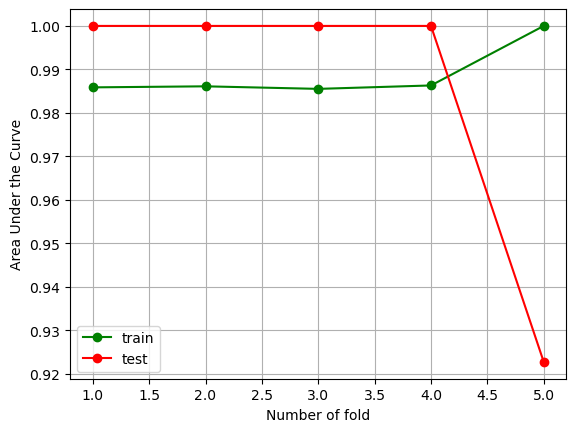

In [69]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix,accuracy_score,classification_report
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("Dectsion Tree Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("Decision Tree Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Dectsion Tree Training Result
[[164   0]
 [  0 634]]
Auc Score 1.0
Accuracy Score 1.0
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       164
         1.0       1.00      1.00      1.00       634

    accuracy                           1.00       798
   macro avg       1.00      1.00      1.00       798
weighted avg       1.00      1.00      1.00       798

Decision Tree Testing Result
[[ 27  15]
 [  6 151]]
Auc Score 0.922732787382469
Accuracy Score 0.8944723618090452
Classification report:               precision    recall  f1-score   support

         0.0       0.82      0.64      0.72        42
         1.0       0.91      0.96      0.93       157

    accuracy                           0.89       199
   macro avg       0.86      0.80      0.83       199
weighted avg       0.89      0.89      0.89       199



# Boosting

## Not Using Hyper Parameter Tuning

In [72]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=6)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = boosting
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

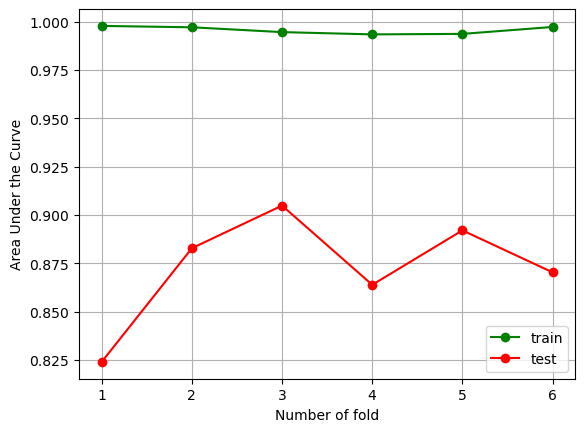

In [73]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [84]:
boosting = GradientBoostingClassifier()
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
max_depth = np.linspace(1, 32, 32, endpoint=True)
min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
# max_features = list(range(1,train.shape[1]))

random_grid = {
    'learning_rate': learning_rate,
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
#     'max_features':max_features
}
print(random_grid)
boosting.get_params().keys()

{'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01], 'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200], 'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.]), 'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5])}


dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [85]:
dt_randomcv=RandomizedSearchCV(estimator=boosting,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100)
dt_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=32; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=32; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=32; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=29.0, min_samples_leaf=0.4, min_samples_split=0.30000000000000004, n_estimators=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=29.0, min_samples_leaf=0.4, min_samples_split=0.30000000000000004, n_estimators=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=29.0, min_samples_leaf=0.4, min_samples_split=0.30000000000000004, n_estimators=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=18.0, min_samples_leaf=0.1, min_samples_split=0.4, n_estimators=64; total time=   0.1s
[CV] END lear

[CV] END learning_rate=0.01, max_depth=20.0, min_samples_leaf=0.5, min_samples_split=0.9, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=20.0, min_samples_leaf=0.5, min_samples_split=0.9, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=14.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=4; total time=   0.0s
[CV] END learning_rate=1, max_depth=14.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=4; total time=   0.0s
[CV] END learning_rate=1, max_depth=14.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=4; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=28.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=64; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=28.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=64; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=1, max_depth=28.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.0s
[CV] END learning_rate=1, max_depth=28.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.0s
[CV] END learning_rate=1, max_depth=28.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=9.0, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=16; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=9.0, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=16; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=9.0, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=16; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=21.0, min_samples_leaf=0.5, min_samples_split=0.4, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=21.0, min_samples_leaf=0.5, min_samples_split=

[CV] END learning_rate=0.1, max_depth=11.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=11.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11.0, min_samples_leaf=0.5, min_samples_split=0.8, n_estimators=32; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11.0, min_samples_leaf=0.5, min_samples_split=0.8, n_estimators=32; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11.0, min_samples_leaf=0.5, min_samples_split=0.8, n_estimators=32; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.2, n_estimators=4; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.2, n_estimators=4; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_le

[CV] END learning_rate=0.01, max_depth=17.0, min_samples_leaf=0.4, min_samples_split=0.1, n_estimators=16; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=17.0, min_samples_leaf=0.4, min_samples_split=0.1, n_estimators=16; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=1.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=1.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=1.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=1.0, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=4; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=1.0, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=4; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=1.0, min_samples_leaf=0.1, min_samples_sp

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.]),
                                        'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'n_estimators': [1, 2, 4, 8, 16, 32, 64,
                                                         100, 200]},
                   random_state=100, verbose=2)

In [86]:
dt_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 0.7000000000000001,
 'min_samples_leaf': 0.1,
 'max_depth': 24.0,
 'learning_rate': 1}

In [88]:
param_grid = {
 'n_estimators': [200, 100, 150, 250, 300, 400],
 'min_samples_split': [0.7000000000000001, 0.75, 0.80, 0.85, 0.65],
 'min_samples_leaf': [0.1, 0.15, 0.125, 0.2, 0.3, 0.25],
 'max_depth': [24.0,25.0, 23.0, 22.0, 26.0],
 'learning_rate': [1, 1.5, 1.25, 0.5,0.25]
}
print(param_grid)

{'n_estimators': [200, 100, 150, 250, 300, 400], 'min_samples_split': [0.7000000000000001, 0.75, 0.8, 0.85, 0.65], 'min_samples_leaf': [0.1, 0.15, 0.125, 0.2, 0.3, 0.25], 'max_depth': [24.0, 25.0, 23.0, 22.0, 26.0], 'learning_rate': [1, 1.5, 1.25, 0.5, 0.25]}


In [89]:
grid_search=GridSearchCV(estimator=boosting,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 4500 candidates, totalling 45000 fits
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.700000000000000

[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total

[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END

[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.2s


[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s


[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_ra

[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=

[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s


[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=

[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=

[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END lear

[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; tot

[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=

[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; tot

[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.

[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total

[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END

[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s


[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s


[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, m

[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s


[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END

[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.5s


[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.5s


[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.5s
[CV] END learning_ra

[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=

[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s


[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=

[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, m

[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s


[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END

[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s


[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s


[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_ra

[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=

[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s


[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=

[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=

[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END lear

[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; tot

[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=

[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; tot

[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, m

[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s


[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END

[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s


[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s


[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, m

[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.7s


[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END

[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.5s


[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   1.2s


[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_ra

[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=

[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.

[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=

[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.7s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.7s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.7s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.7s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.3s
[CV] END learning_rate=1, m

[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s


[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END

[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.3s


[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.6s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.9s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.9s


[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_ra

[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=

[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s


[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=

[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=

[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END lear

[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; tot

[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total t

[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; tot

[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, m

[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s


[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END

[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s


[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s


[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, m

[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s


[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END

[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s


[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s


[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_ra

[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=

[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=  

[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=

[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, m

[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s


[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END

[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s


[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s


[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_ra

[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=

[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s


[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=400; total time=

[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=

[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END lear

[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total

[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; tota

[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; tot

[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, m

[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s


[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END

[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s


[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s


[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, m

[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s


[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END

[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s


[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s


[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_ra

[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0

[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=

[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, m

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s


[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.4s


[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s


[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_ra

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=300; total time=

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s


[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=400; total time=

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001,

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END lear

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total ti

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; tot

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; tot

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, m

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s


[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s


[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s


[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, m

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s


[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.7s


[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estim

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_dept

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=

[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END lear

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; tot

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; tot

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.9s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; tot

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] E

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; tot

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.9s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_est

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_est

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END lear

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estim

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; tot

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; tot

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END lear

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; tot

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; tot

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; tot

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] E

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; tot

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END lear

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=200; total 

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; tot

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=100; tot

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] E

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_est

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_est

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_est

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END lear

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; tot

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=400; total time=

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; tot

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; tot

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; tot

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] E

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END lear

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; tot

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=300; total time=

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; tot

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=400; total time=   1.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=400; total time=   1.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=400; tot

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] E

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=400; total time=   1.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=400; total time=   1.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=400; total time=   1.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; 

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=200; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_est

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_est

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_est

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] END lear

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; tot

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; tot

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; tot

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END lear

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; tot

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; tot

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; tot

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] E

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200

[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END lear

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; tot

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; tot

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; tot

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] E

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; tot

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_est

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_est

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END lear

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total ti

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; tot

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; tot

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END lear

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; tot

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; tot

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; tot

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] E

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; tot

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.9s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.9s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END lear

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; tot

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; tot

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.6s
[CV] E

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; tot

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_est

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_est

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_est

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END lear

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; tot

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; tot

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   1.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   1.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; tot

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END lear

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; tot

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total t

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; tot

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] E

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; tot

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] E

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; tot

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_est

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_est

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_est

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_es

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.6

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] E

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75,

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; tot

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] E

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_est

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_est

[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_est

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] E

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; to

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_est

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_est

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_est

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_est

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.6

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] E

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; tot

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] E

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; tot

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.6s

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, m

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_est

[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_est

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] E

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_est

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_est

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_est

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_est

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.700

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] E

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200;

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] E

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_est

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_est

[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_est

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] E

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; tot

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=400; total time=   1.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, 

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_est

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_est

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_est

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.6

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] E

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; tot

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] E

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; tot

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estima

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_esti

[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_est

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] E

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; tot

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_est

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_est

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_est

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_est

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.6

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] E

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.8s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=400; total time=   0.7s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; t

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] E

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; tot

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_est

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_est

[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=1.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_est

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END lear

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; tot

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=300; total time=

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; tot

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=400; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=400; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=400; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=400; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=400; tot

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] E

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; 

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_est

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_est

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_est

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END lear

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; tot

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; tot

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; tot

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END lear

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; tot

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; tot

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=400; tot

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] E

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200

[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END lear

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; tot

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; tot

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; tot

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] E

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; tot

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_est

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_est

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_est

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END lear

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; tota

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; tot

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END lear

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; tot

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; tot

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; tot

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] E

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; tot

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.9s
[CV] END lear

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; tot

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; tot

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=400; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=400; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_dept

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.5s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=23.0, min_

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; tot

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_est

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_est

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_est

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END lear

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; tot

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; tot

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; tot

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END lear

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; tot

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; tot

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] E

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_sampl

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; tot

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] END lear

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; tot

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; tot

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; tot

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] E

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; tot

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_est

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_est

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END lear

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estim

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; tot

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; tot

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END lear

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; tot

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; tot

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; tot

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] E

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; tot

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END lear

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=200; total

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; tota

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=100; tot

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] E

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; tot

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_est

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_est

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_est

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END lear

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; tot

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=400; total time=

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; tot

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.70000000000

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END lear

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total ti

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; tot

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; tot

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] E

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] E

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=300; tot

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=400; total time=   1.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.75, n_est

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_est

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_dept

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_ra

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8, n_e

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.8

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.125, min_samples_split=0.6

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] E

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.3s
[CV] E

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=250; tot

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.75, n_est

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.85, n_est

[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=24.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_l

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_d

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=200; to

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.75, n_est

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.85, n_est

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.15, min_samples_split=0.65, n_est

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=250; total time=

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.7

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8, n_est

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.8

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.125, min_samples_split=0.6

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s
[CV] E

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=400; tot

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001,

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.6s
[CV] E

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200;

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.75, n_est

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.85, n_est

[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=25.0, min_samples_leaf=0.25, min_samples_split=0.65, n_est

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] E

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=250; tot

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=300; total time=   1.0s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.6s

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.75, n_est

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.85, n_est

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.15, min_samples_split=0.65, n_est

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=400; total time=

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.7

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_e

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.125, min_samples_split=0.6

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] E

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.75,

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; tot

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.4s
[CV] E

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.75, n_est

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.85, n_est

[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=23.0, min_samples_leaf=0.25, min_samples_split=0.65, n_est

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.1s
[CV] E

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   1.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.6s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=400; total time=   1.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   1.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=400; total time=   1.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=200; to

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   1.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.5s

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.75, n_est

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.85, n_est

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.15, min_samples_split=0.65, n_est

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=150; total time=

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.7

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8, n_est

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.8

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.125, min_samples_split=0.6

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] E

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=250; tot

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.4s
[CV] E

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=400; tot

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=200; total time=   0.3s

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, m

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.85, n_est

[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.25, min_samples_split=0.65, n_est

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.2s
[CV] E

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=250; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.1, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.5s

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.75, n_est

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.85, n_est

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.15, min_samples_split=0.65, n_est

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7000000000000001, n_estimators=300; total time=

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.75, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.7

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8, n_est

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.85, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.8

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.125, min_samples_split=0.65, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.700

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.8s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7000000000000001, n_estimators=400; total time=   1.0s
[CV] E

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=400; total time=   0.7s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200;

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7000000000000001, n_estimators=100; total time=   0.1s
[CV] E

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7000000000000001, n_estimators=250; total time=   0.4s

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_est

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=250; total time=   0.3s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=250; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_est

[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.25, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_est

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [1, 1.5, 1.25, 0.5, 0.25],
                         'max_depth': [24.0, 25.0, 23.0, 22.0, 26.0],
                         'min_samples_leaf': [0.1, 0.15, 0.125, 0.2, 0.3, 0.25],
                         'min_samples_split': [0.7000000000000001, 0.75, 0.8,
                                               0.85, 0.65],
                         'n_estimators': [200, 100, 150, 250, 300, 400]},
             verbose=2)

In [90]:
best_grid = grid_search.best_estimator_
best_grid

GradientBoostingClassifier(learning_rate=1, max_depth=24.0,
                           min_samples_leaf=0.2, min_samples_split=0.75,
                           n_estimators=150)

In [107]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=5)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

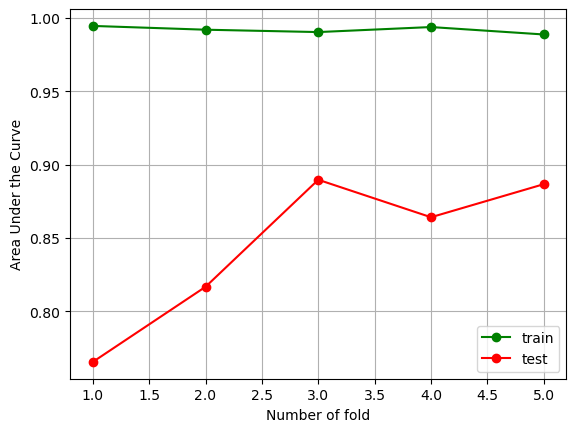

In [92]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix,accuracy_score,classification_report
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("Dectsion Tree Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("Decision Tree Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Dectsion Tree Training Result
[[144  20]
 [ 13 621]]
Auc Score 0.9888387704854966
Accuracy Score 0.9586466165413534
Classification report:               precision    recall  f1-score   support

         0.0       0.92      0.88      0.90       164
         1.0       0.97      0.98      0.97       634

    accuracy                           0.96       798
   macro avg       0.94      0.93      0.94       798
weighted avg       0.96      0.96      0.96       798

Decision Tree Testing Result
[[ 33   9]
 [ 10 147]]
Auc Score 0.8867151956323931
Accuracy Score 0.9045226130653267
Classification report:               precision    recall  f1-score   support

         0.0       0.77      0.79      0.78        42
         1.0       0.94      0.94      0.94       157

    accuracy                           0.90       199
   macro avg       0.85      0.86      0.86       199
weighted avg       0.91      0.90      0.90       199



In [115]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=6)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = stacking
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

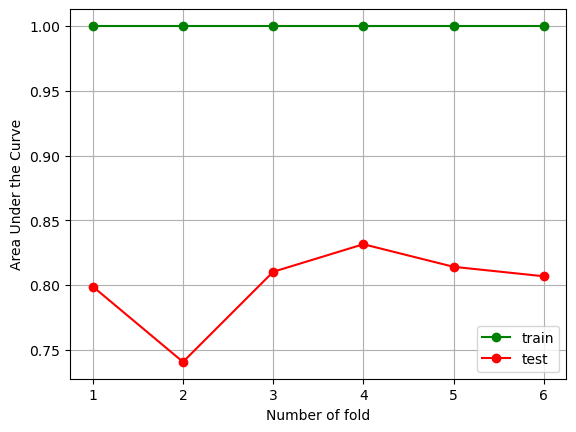

In [116]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [118]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix,accuracy_score,classification_report
best_grid = stacking
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("Dectsion Tree Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("Decision Tree Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Dectsion Tree Training Result
[[170   0]
 [  0 661]]
Auc Score 1.0
Accuracy Score 1.0
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       170
         1.0       1.00      1.00      1.00       661

    accuracy                           1.00       831
   macro avg       1.00      1.00      1.00       831
weighted avg       1.00      1.00      1.00       831

Decision Tree Testing Result
[[ 19  17]
 [  5 125]]
Auc Score 0.8068376068376069
Accuracy Score 0.8674698795180723
Classification report:               precision    recall  f1-score   support

         0.0       0.79      0.53      0.63        36
         1.0       0.88      0.96      0.92       130

    accuracy                           0.87       166
   macro avg       0.84      0.74      0.78       166
weighted avg       0.86      0.87      0.86       166

